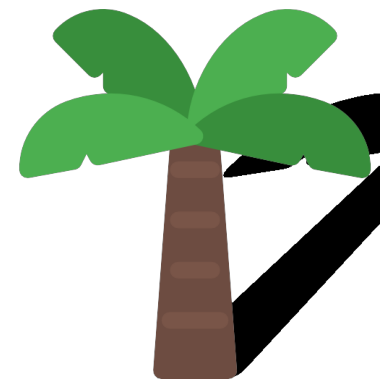

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

palm_image_path = '/kaggle/input/f4ff34f3/palm.png'
palm_image = Image.open(palm_image_path)

def create_shadow(image):
    if image.mode != 'RGBA':
        image = image.convert('RGBA')
    
    shadow = image.copy()
    datas = shadow.getdata()
    new_data = []
    for item in datas:
        if item[3] != 0:
            new_data.append((0, 0, 0, 255))
        else:
            new_data.append(item)
    shadow.putdata(new_data)
    
    a = 1
    b = 1
    c = -510
    d = 0
    e = 1
    f = 0.9
    shadow = shadow.transform(shadow.size, Image.AFFINE, (a, b, c, d, e, f))
    
    return shadow

shadow = create_shadow(palm_image)

result_image = Image.new('RGBA', palm_image.size)
result_image.paste(shadow, (0,0), shadow)
result_image.paste(palm_image, (0,0), palm_image)

result_image_path = '/kaggle/working/palm_with_shadow.png'
result_image.save(result_image_path)

plt.imshow(result_image)
plt.axis('off')
plt.show()
